# Tangent


### Source
[github](https://github.com/google/tangent)

### Installation
- `pip install tangent`

In [1]:
# NOTE: this is a custom cell that contains the common imports I personally 
# use these may/may not be necessary for the following examples

# DL framework
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

from datetime import datetime

# common packages
import numpy as np
import os # handling file i/o
import sys
import math
import time # timing epochs

# for ordered dict when building layer components
import collections

# plotting pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import colors # making colors consistent
from mpl_toolkits.axes_grid1 import make_axes_locatable # colorbar helper

# read image
from imageio import imread
# + data augmentation
from scipy import ndimage
from scipy import misc

# used for manually saving best params
import pickle

# for shuffling data batches
from sklearn.utils import shuffle

# const
SEED = 42

# Helper to make the output consistent
def reset_graph(seed=SEED):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# helper to create dirs if they don't already exist
def maybe_create_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
        print("{} createed".format(dir_path))
    else:
        print("{} already exists".format(dir_path))
    
# set tf log level to supress messages, unless an error
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Important Version information
print("Python: {}".format(sys.version_info[:]))
print('TensorFlow: {}'.format(tf.__version__))

# Check if using GPU
if not tf.test.gpu_device_name():
    print('No GPU found')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
    
reset_graph()

Python: (3, 5, 4, 'final', 0)
TensorFlow: 1.6.0-dev20180105
No GPU found


In [2]:
import tangent

# for using widgets
from ipywidgets import widgets
from ipywidgets import interactive
from IPython.display import display

## Function to create plot
The plot will show f(x), f'(x), and f''(x)

In [3]:
def draw_f_df_ddf_plot(bounds=4, N_samples=100, func=None):
    plt.figure(figsize=(12,8))
    
    # create input data for plotting
    x = np.linspace(-bounds,bounds,N_samples)
    
    # plot main function
    plt.plot(x,func(x), linewidth=4)
    
    # calculate and plot derivative
    df = tangent.grad(func)
    plt.plot(x,[df(val) for val in x], linewidth=4)
    
    # calculate second derivative
    ddf = tangent.grad(df)
    plt.plot(x,[ddf(val) for val in x], linewidth=4)

    plt.legend(['f(x)', 'f\'(x)', 'f\'\'(x)'],fontsize=12)
    
    # add axis line after plotting functions - otherwise
    # the ledgend will include axis lines
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.grid(True)
    plt.show()

### Define Function

In [4]:
def custom_poly(in_val, m=2., exp=4., b=2.):
    # this is the classic mx^exp+b function
    # if "m=2., exp=4., b=2." then the represented function is;
    # > f(x) = 2x^4 + 2
    out = in_val**exp
    out = m*out
    out = out + b

    return out

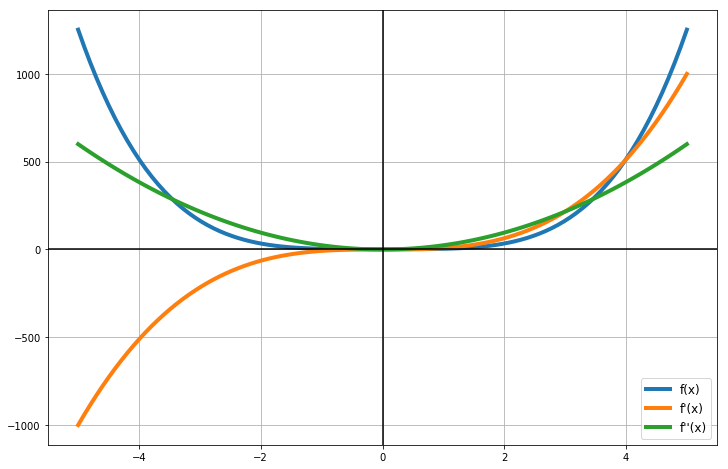

In [5]:
draw_f_df_ddf_plot(bounds=5, func=custom_poly)